In [4]:
from faker import Faker


In [1]:
import numpy as np
import pandas as pd
import os
import random
import matplotlib.pyplot as plt


#Genarate Synthetic data

In [6]:
fake=Faker()

In [7]:
def faker_cat(num=1, seed=None):
    np.random.seed(seed)
    fake.seed_instance(seed)
    output=[{
        #"address":fake.address(),
        #patient parameter
        "P_Mobility":np.random.choice(['Yes','No']),#0
        "P_Wheelchair":np.random.choice(['Yes','No'],p=[0.5,0.5]),#1
        "P_Diabetic":np.random.choice(['Yes','No'],p=[0.5,0.5]),#2
        "P_Heartproblem":np.random.choice(['Yes','No'],p=[0.3,0.7]),#3
        "P_Asthmatic":np.random.choice(['Yes','No'],p=[0.5,0.5]),#4
        "P_Dementia":np.random.choice(['Yes','No'],p=[0.5,0.5]),#5
        "P_Ambulance":np.random.choice(['Yes','No'],p=[0.9,0.1]),#6
        "P_Alcohol":np.random.choice(['Yes','No'],p=[0.5,0.5]),#7
        "P_Dog":np.random.choice(['Yes','No'],p=[0.9,0.1]),#8
        "P_Gender":np.random.choice(['Male','Female']),#9
        "P_Multilangual":np.random.choice(['Yes','No'],p=[0.5,0.5]),#10
        #caregiver parameter
        "C_Gender":np.random.choice(['Male','Female'],p=[0.5,0.5]),#11
        "C_Ethnicity":np.random.choice(['African','American','Asian','Maori','Pasifika','European','Middle Eastern'],p=[0.05,0.05,0.2,0.4,0.05,0.2,0.05]),#12
        "C_Mobility":np.random.choice(['Yes','No'],p=[0.9,0.1]),#13
        "C_Vehicles":np.random.choice(['Yes','No'],p=[0.9,0.1]),#14
        "C_Multilangual":np.random.choice(['Yes','No'],p=[0.5,0.5]),#15
        "C_ComfortableEnglish":np.random.choice(['Yes','No'],p=[0.9,0.1]),#16
        "C_Availability":np.random.choice(['Yes','No'],p=[0.9,0.1]),#17
        "C_Heart_P_Experience":np.random.choice(['Yes','No'],p=[0.5,0.5]),#18
        "C_Dog_Friendly":np.random.choice(['Yes','No'],p=[0.9,0.1]),#19
        "C_HeavyLifting":np.random.choice(['Yes','No'],p=[0.9,0.1]),#20
        "C_Distance":fake.pyint(min_value=50, max_value=1200),#21
        "Feedback_Score":np.random.choice(np.arange(0,6,1),p=[0.5,0.05,0.05,0.30,0.05,0.05]),#22
        # output / Dependent variable
        "Rank":np.random.choice(['Yes','No'],p=[0.5,0.5]),
    }
        for x in range (num)
    ]
    return output

In [8]:
df=pd.DataFrame(faker_cat(num=10000,seed=0))
df.head()

,P_Mobility,P_Wheelchair,P_Diabetic,P_Heartproblem,P_Asthmatic,P_Dementia,P_Ambulance,P_Alcohol,P_Dog,P_Gender,...,C_Vehicles,C_Multilangual,C_ComfortableEnglish,C_Availability,C_Heart_P_Experience,C_Dog_Friendly,C_HeavyLifting,C_Distance,Feedback_Score,Rank
0,Yes,No,No,No,No,No,Yes,Yes,Yes,Male,...,No,Yes,Yes,Yes,No,Yes,Yes,838,5,No
1,No,No,No,No,No,No,Yes,Yes,Yes,Male,...,Yes,No,Yes,No,No,Yes,Yes,911,3,Yes
2,No,No,Yes,No,No,No,Yes,Yes,Yes,Male,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,132,0,Yes
3,No,Yes,No,No,No,No,Yes,Yes,Yes,Female,...,Yes,Yes,Yes,Yes,No,Yes,Yes,580,1,Yes
4,No,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Female,...,Yes,No,No,Yes,No,Yes,Yes,1097,0,No


In [9]:
df.shape
print(df.columns)

Index(['P_Mobility', 'P_Wheelchair', 'P_Diabetic', 'P_Heartproblem',
       'P_Asthmatic', 'P_Dementia', 'P_Ambulance', 'P_Alcohol', 'P_Dog',
       'P_Gender', 'P_Multilangual', 'C_Gender', 'C_Ethnicity', 'C_Mobility',
       'C_Vehicles', 'C_Multilangual', 'C_ComfortableEnglish',
       'C_Availability', 'C_Heart_P_Experience', 'C_Dog_Friendly',
       'C_HeavyLifting', 'C_Distance', 'Feedback_Score', 'Rank'],
      dtype='object')


In [10]:
print(df.iloc[0][6])

Yes


In [11]:
#Output Rules
for i in range(df.shape[0]):
    if (df.iloc[i][0]=='Yes' and df.iloc[i][6]=='Yes' and df.iloc[i][17]=='Yes' and df.iloc[i][19]=='Yes'and df.iloc[i][3]=='Yes' and df.iloc[i][18]=='Yes'and df.iloc[i][21]<1000) and df.iloc[i][20]=='Yes' :
        df.at[i,'Rank']='Yes'
    elif (df.iloc[i][0]=='Yes' and df.iloc[i][6]=='Yes' and df.iloc[i][17]=='Yes' and df.iloc[i][19]=='Yes'and df.iloc[i][3]=='No'and df.iloc[i][21]<1000) and df.iloc[i][20]=='Yes':
        df.at[i,'Rank']='Yes'
    elif (df.iloc[i][0]=='Yes' and df.iloc[i][6]=='No' and df.iloc[i][14]=='Yes'  and df.iloc[i][17]=='Yes' and df.iloc[i][19]=='Yes'and df.iloc[i][3]=='No' and df.iloc[i][18]=='Yes'and df.iloc[i][21]<1000) and df.iloc[i][20]=='Yes':
        df.at[i,'Rank']='Yes'
    elif (df.iloc[i][0]=='Yes' and df.iloc[i][14]=='Yes'  and df.iloc[i][17]=='Yes' and df.iloc[i][19]=='Yes'and df.iloc[i][3]=='No' and df.iloc[i][18]=='Yes'and df.iloc[i][21]<1000) and df.iloc[i][20]=='Yes':
        df.at[i,'Rank']='Yes'
    
   
            
     
    else:
        df.at[i,'Rank'] = 'No'


        


In [12]:
df.head()

,P_Mobility,P_Wheelchair,P_Diabetic,P_Heartproblem,P_Asthmatic,P_Dementia,P_Ambulance,P_Alcohol,P_Dog,P_Gender,...,C_Vehicles,C_Multilangual,C_ComfortableEnglish,C_Availability,C_Heart_P_Experience,C_Dog_Friendly,C_HeavyLifting,C_Distance,Feedback_Score,Rank
0,Yes,No,No,No,No,No,Yes,Yes,Yes,Male,...,No,Yes,Yes,Yes,No,Yes,Yes,838,5,Yes
1,No,No,No,No,No,No,Yes,Yes,Yes,Male,...,Yes,No,Yes,No,No,Yes,Yes,911,3,No
2,No,No,Yes,No,No,No,Yes,Yes,Yes,Male,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,132,0,No
3,No,Yes,No,No,No,No,Yes,Yes,Yes,Female,...,Yes,Yes,Yes,Yes,No,Yes,Yes,580,1,No
4,No,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Female,...,Yes,No,No,Yes,No,Yes,Yes,1097,0,No


In [13]:
df["Rank"].replace({"Yes": 1, "No": 0}, inplace=True)

In [16]:
Ycount=0
Ncount=0
for i in range(df.shape[0]):
    if df.iloc[i][23]==1:
        Ycount+=1
    else:
        Ncount+=1
print("Yes=",Ycount)
print("No=",Ncount)

Yes= 2423
No= 7577


Save Binary rank data to CSV file

In [17]:
df.to_csv('Binary_Rank.csv', index=False)

In [19]:
data = pd.read_csv('Binary_Rank.csv')
data.head()

,P_Mobility,P_Wheelchair,P_Diabetic,P_Heartproblem,P_Asthmatic,P_Dementia,P_Ambulance,P_Alcohol,P_Dog,P_Gender,...,C_Vehicles,C_Multilangual,C_ComfortableEnglish,C_Availability,C_Heart_P_Experience,C_Dog_Friendly,C_HeavyLifting,C_Distance,Feedback_Score,Rank
0,Yes,No,No,No,No,No,Yes,Yes,Yes,Male,...,No,Yes,Yes,Yes,No,Yes,Yes,838,5,1
1,No,No,No,No,No,No,Yes,Yes,Yes,Male,...,Yes,No,Yes,No,No,Yes,Yes,911,3,0
2,No,No,Yes,No,No,No,Yes,Yes,Yes,Male,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,132,0,0
3,No,Yes,No,No,No,No,Yes,Yes,Yes,Female,...,Yes,Yes,Yes,Yes,No,Yes,Yes,580,1,0
4,No,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Female,...,Yes,No,No,Yes,No,Yes,Yes,1097,0,0


In [41]:
    df["P_Mobility"].replace({"Yes": 1, "No": 0}, inplace=True)    
    df["P_Wheelchair"].replace({"Yes": 1, "No": 0}, inplace=True)  
    df["P_Diabetic"].replace({"Yes": 1, "No": 0}, inplace=True)    
    df["P_Heartproblem"].replace({"Yes": 1, "No": 0}, inplace=True)   
    df["P_Asthmatic"].replace({"Yes": 1, "No": 0}, inplace=True)    
    df["P_Dementia"].replace({"Yes": 1, "No": 0}, inplace=True)  
    df["P_Ambulance"].replace({"Yes": 1, "No": 0}, inplace=True)    
    df["P_Alcohol"].replace({"Yes": 1, "No": 0}, inplace=True)       
    df["P_Dog"].replace({"Yes": 1, "No": 0}, inplace=True)    
    df["P_Gender"].replace({"Male": 1, "Female": 0}, inplace=True)  
    df["P_Multilangual"].replace({"Yes": 1, "No": 0}, inplace=True)    
    df["C_Gender"].replace({"Male": 1, "Female": 0}, inplace=True)
    
    df["C_Mobility"].replace({"Yes": 1, "No": 0}, inplace=True)    
    df["C_Vehicles"].replace({"Yes": 1, "No": 0}, inplace=True)  
    df["C_Multilangual"].replace({"Yes": 1, "No": 0}, inplace=True)    
    df["C_ComfortableEnglish"].replace({"Yes": 1, "No": 0}, inplace=True)       
    df["C_Availability"].replace({"Yes": 1, "No": 0}, inplace=True)    
    df["C_Heart_P_Experience"].replace({"Yes": 1, "No": 0}, inplace=True)  
    df["C_Dog_Friendly"].replace({"Yes": 1, "No": 0}, inplace=True)    
    df["C_HeavyLifting"].replace({"Yes": 1, "No": 0}, inplace=True)        
    df["C_Ethnicity"].replace({"African": 1, "American": 2, "Asian": 3, "Maori": 4, "Pasifika": 5, "European": 6, "Middle Eastern": 7}, inplace=True)  
    df.head()

    
       



,P_Mobility,P_Wheelchair,P_Diabetic,P_Heartproblem,P_Asthmatic,P_Dementia,P_Ambulance,P_Alcohol,P_Dog,P_Gender,...,C_Vehicles,C_Multilangual,C_ComfortableEnglish,C_Availability,C_Heart_P_Experience,C_Dog_Friendly,C_HeavyLifting,C_Distance,Feedback_Score,Rank
0,1,0,0,0,0,0,1,1,1,1,...,0,1,1,1,0,1,1,838,5,1
1,0,0,0,0,0,0,1,1,1,1,...,1,0,1,0,0,1,1,911,3,0
2,0,0,1,0,0,0,1,1,1,1,...,1,1,1,1,1,1,1,132,0,0
3,0,1,0,0,0,0,1,1,1,0,...,1,1,1,1,0,1,1,580,1,0
4,0,1,1,1,0,0,1,1,1,0,...,1,0,0,1,0,1,1,1097,0,0


In [42]:
df.to_csv('Binary_Rank_Final.csv', index=False)

In [2]:
data = pd.read_csv('Binary_Rank_Final.csv')
data.head()

,P_Mobility,P_Wheelchair,P_Diabetic,P_Heartproblem,P_Asthmatic,P_Dementia,P_Ambulance,P_Alcohol,P_Dog,P_Gender,...,C_Vehicles,C_Multilangual,C_ComfortableEnglish,C_Availability,C_Heart_P_Experience,C_Dog_Friendly,C_HeavyLifting,C_Distance,Feedback_Score,Rank
0,1,0,0,0,0,0,1,1,1,1,...,0,1,1,1,0,1,1,838,5,1
1,0,0,0,0,0,0,1,1,1,1,...,1,0,1,0,0,1,1,911,3,0
2,0,0,1,0,0,0,1,1,1,1,...,1,1,1,1,1,1,1,132,0,0
3,0,1,0,0,0,0,1,1,1,0,...,1,1,1,1,0,1,1,580,1,0
4,0,1,1,1,0,0,1,1,1,0,...,1,0,0,1,0,1,1,1097,0,0


In [3]:
x=data[['P_Mobility', 'P_Wheelchair', 'P_Diabetic', 'P_Heartproblem',
       'P_Asthmatic', 'P_Dementia', 'P_Ambulance', 'P_Alcohol', 'P_Dog',
       'P_Gender', 'P_Multilangual', 'C_Gender', 'C_Ethnicity', 'C_Mobility',
       'C_Vehicles', 'C_Multilangual', 'C_ComfortableEnglish',
       'C_Availability', 'C_Heart_P_Experience', 'C_Dog_Friendly',
       'C_HeavyLifting', 'C_Distance', 'Feedback_Score']]


In [4]:
y=data["Rank"]

In [5]:
from collections import Counter
counter = Counter(y)
for k,v in counter.items():
  dist = round(v / len(y) * 100, 2)
  print(f"Rank={k}, n={v} ({dist})")

Rank=1, n=2423 (24.23)
Rank=0, n=7577 (75.77)


<BarContainer object of 2 artists>

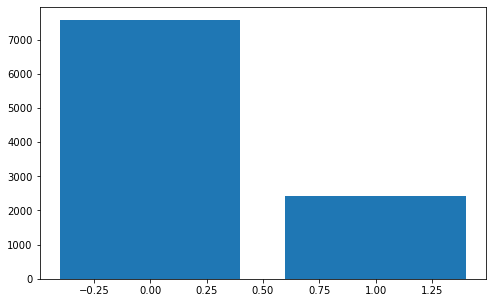

In [6]:
plt.figure(1, figsize=(8, 5))
plt.bar(counter.keys(), counter.values())

In [7]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import  Pipeline

In [8]:
oversample = SMOTE()
undersample = RandomUnderSampler()
steps = [("o", oversample), ("u", undersample)]
pipeline = Pipeline(steps=steps)
x, y =pipeline.fit_resample(x, y)

In [9]:
counter = Counter(y)
for k,v in counter.items():
  dist = v / len(y) * 100
  print(f"Rank={k}, n={v} ({dist})")

Rank=0, n=7577 (50.0)
Rank=1, n=7577 (50.0)


<BarContainer object of 2 artists>

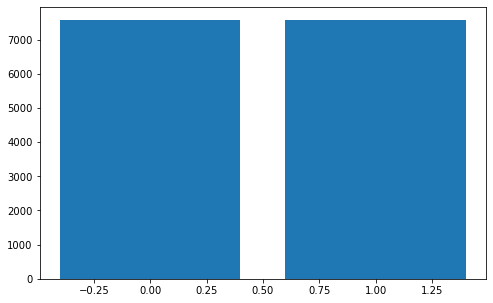

In [10]:
plt.figure(1, figsize=(8, 5))
plt.bar(counter.keys(), counter.values())

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
features = [ 'C_Distance', 'Feedback_Score']
data[features] = scaler.fit_transform(data[features])
data.head()

,P_Mobility,P_Wheelchair,P_Diabetic,P_Heartproblem,P_Asthmatic,P_Dementia,P_Ambulance,P_Alcohol,P_Dog,P_Gender,...,C_Vehicles,C_Multilangual,C_ComfortableEnglish,C_Availability,C_Heart_P_Experience,C_Dog_Friendly,C_HeavyLifting,C_Distance,Feedback_Score,Rank
0,1,0,0,0,0,0,1,1,1,1,...,0,1,1,1,0,1,1,0.685217,1.0,1
1,0,0,0,0,0,0,1,1,1,1,...,1,0,1,0,0,1,1,0.748696,0.6,0
2,0,0,1,0,0,0,1,1,1,1,...,1,1,1,1,1,1,1,0.071304,0.0,0
3,0,1,0,0,0,0,1,1,1,0,...,1,1,1,1,0,1,1,0.460870,0.2,0
4,0,1,1,1,0,0,1,1,1,0,...,1,0,0,1,0,1,1,0.910435,0.0,0


#Features corelation

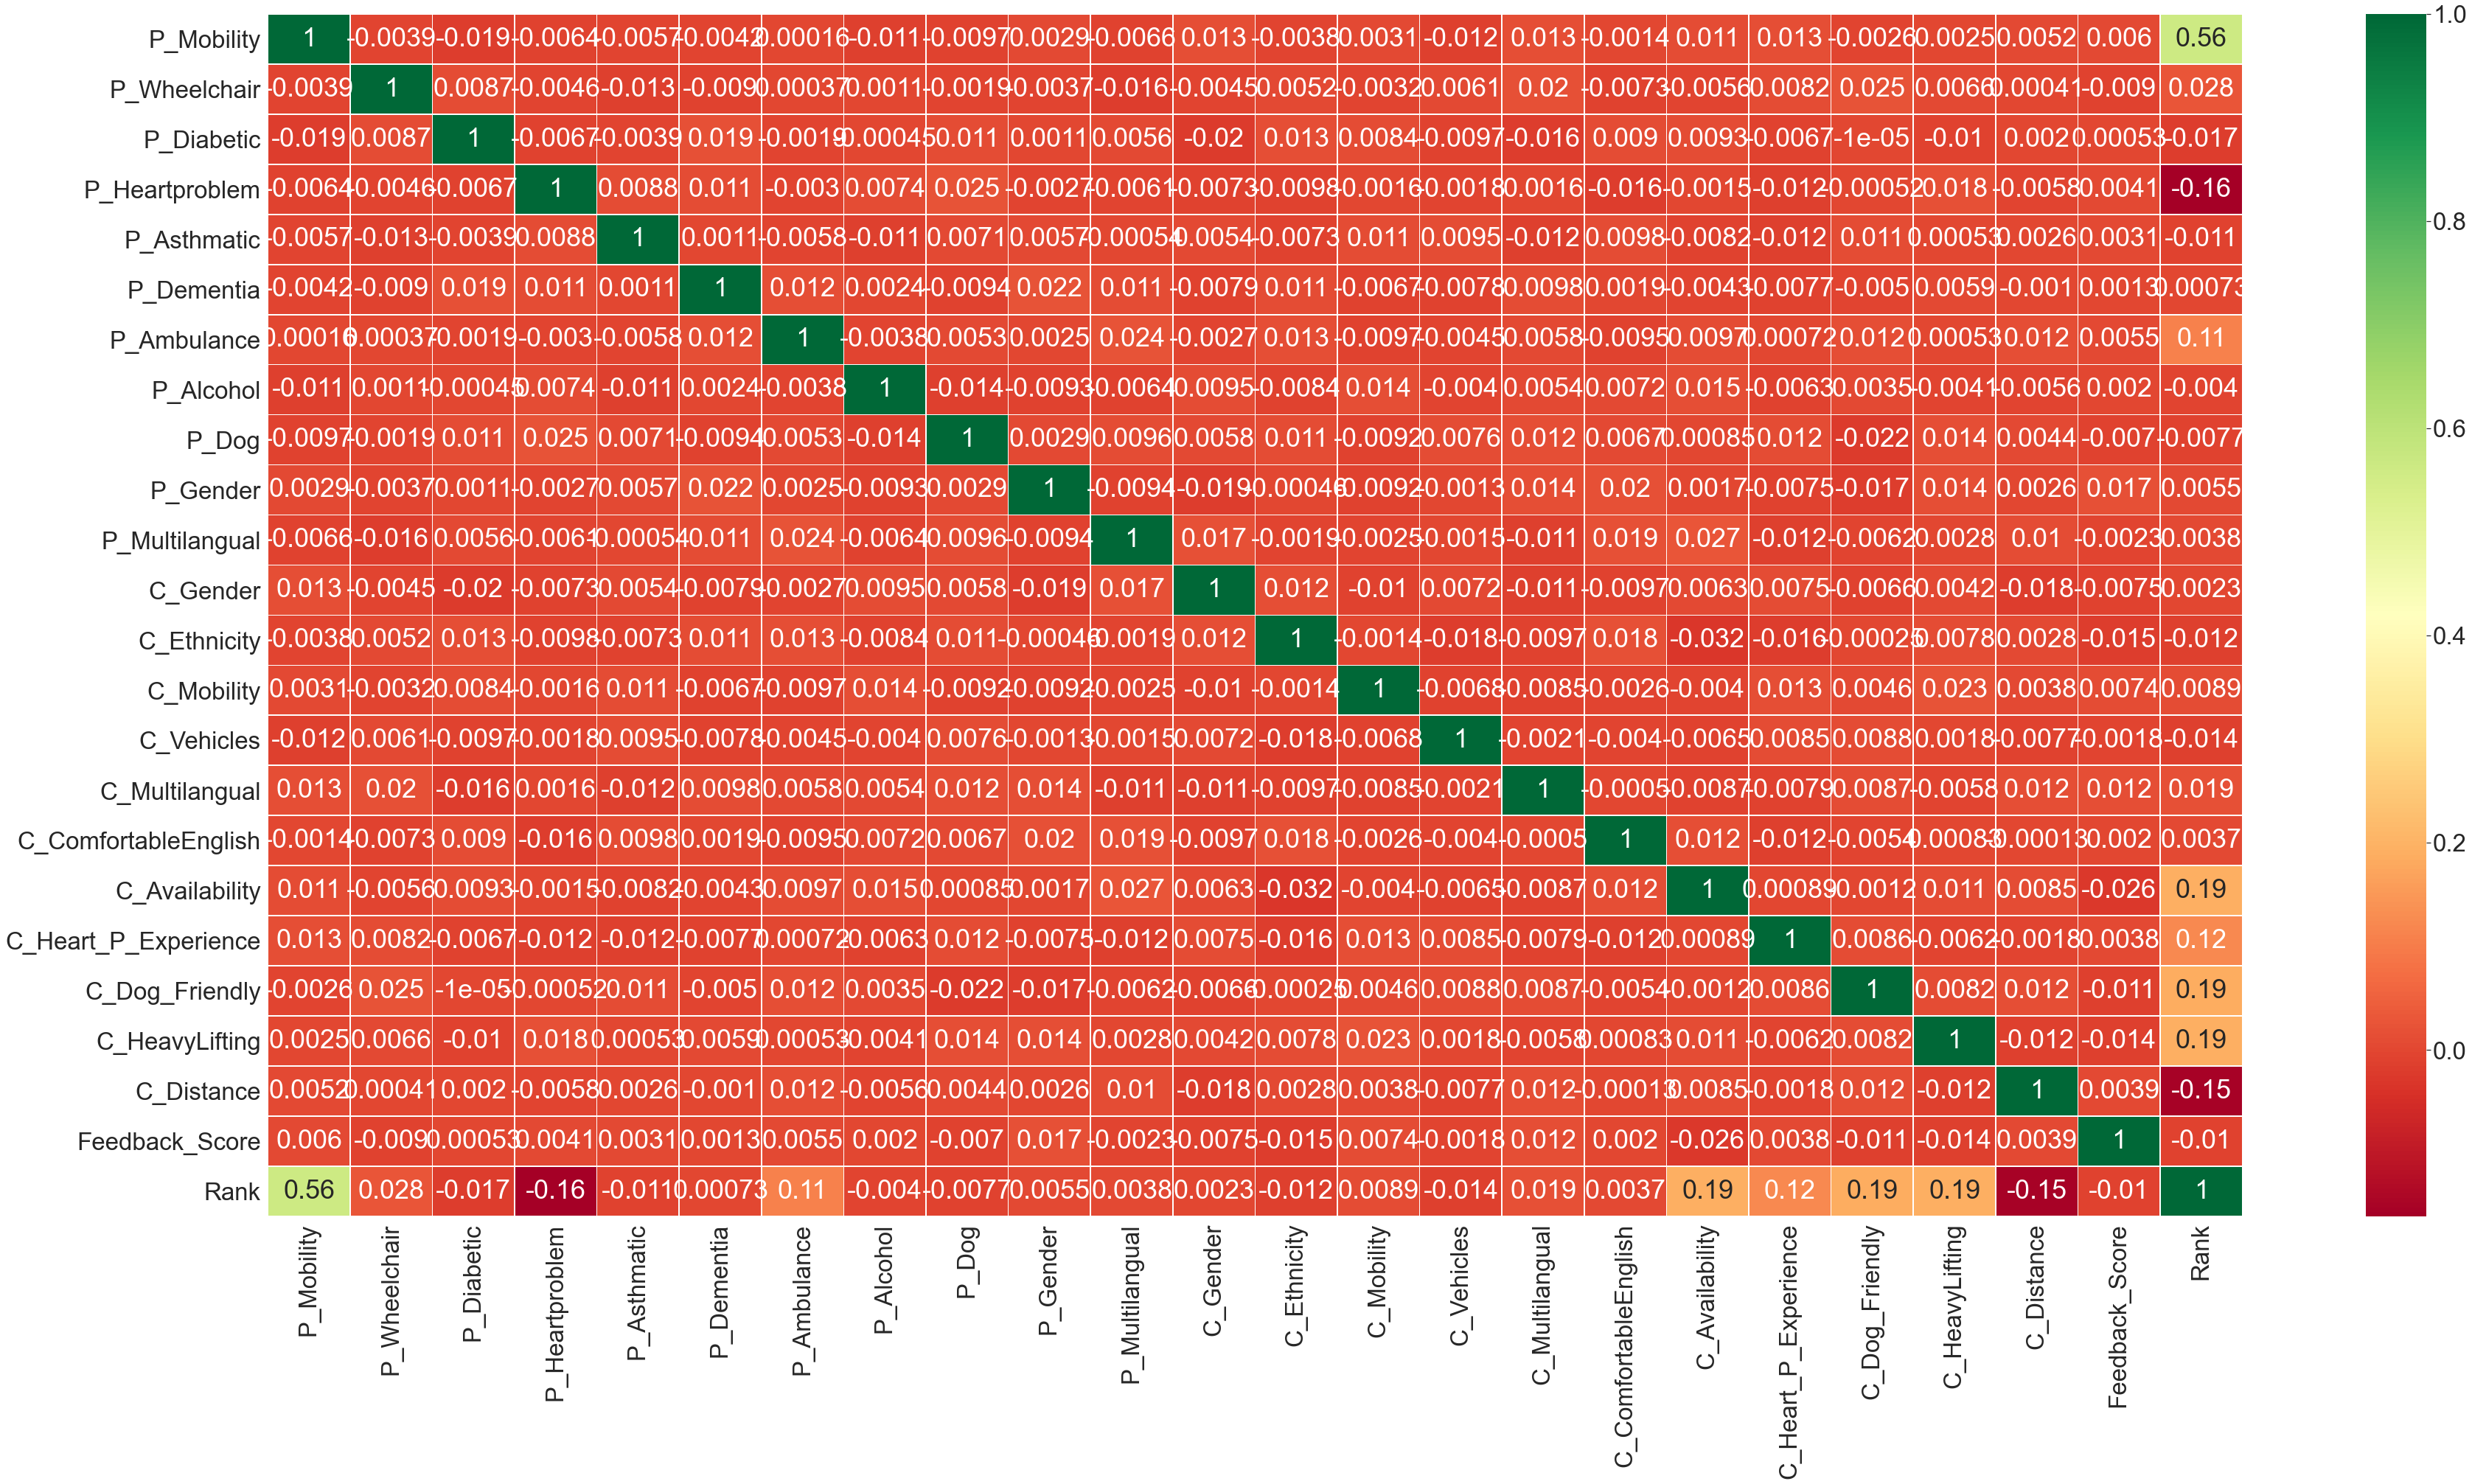

In [28]:
import seaborn as sns
plt.figure(figsize=(60,30))
sns.heatmap(data.corr(), annot=True,linewidths=.7,cmap="RdYlGn")
sns.set(font_scale=2)
plt.show()

Model selection

In [12]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.preprocessing import label_binarize

In [13]:
# Metrics dictionary
accuracy = dict()
precision = dict()
recall = dict()
f1 = dict()
fpr = dict()
tpr = dict()
accuracy_lst=[]
precision_lst=[]
f1Score_lst=[]
recall_lst=[]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.80)

#Random Forest

In [17]:
M_RF = RandomForestClassifier(n_estimators=100,criterion='entropy')
M_RF.fit(x_train,y_train)
RF_Pred = M_RF.predict(x_train)
RF_Pred1 = M_RF.predict(x_test)

In [18]:
from sklearn.model_selection import cross_validate
cv = cross_validate(M_RF, x_train, y_train, cv=10)
print(cv['test_score'])
print(cv['test_score'].mean())

[0.99752679 0.99587799 0.99340478 0.99339934 0.99587459 0.99174917
 0.99422442 0.99422442 0.99587459 0.99587459]
0.9948030685178987


In [20]:
acc_random_forest = round(M_RF.score(x_train, y_train) * 100, 2)
acc_random_forest1 = round(M_RF.score(x_test, y_test) * 100, 2)
f1_Score2 = round(f1_score(y_test, RF_Pred1, average='macro') * 100, 2)
P_Score2 = round(precision_score(y_test, RF_Pred1, average='macro') * 100, 2)
R_Score2 = round(recall_score(y_test, RF_Pred1, average='macro') * 100, 2)
# Append to the accuracy list
accuracy_lst.append(acc_random_forest1)
precision_lst.append(P_Score2)
f1Score_lst.append(f1_Score2)
recall_lst.append(R_Score2)

print("\nTrain Accuracy", acc_random_forest)
print("Test Accuracy", acc_random_forest1)
print("F1 Score", f1_Score2)
print("Precision Score", P_Score2)
print("Recall Score", R_Score2)


Train Accuracy 100.0
Test Accuracy 99.44
F1 Score 99.44
Precision Score 99.44
Recall Score 99.44


In [22]:
print('\nClassification Report for Training\n')
c_rf = classification_report(y_test,RF_Pred1)
print(c_rf)


Classification Report for Training

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1525
           1       0.99      1.00      0.99      1506

    accuracy                           0.99      3031
   macro avg       0.99      0.99      0.99      3031
weighted avg       0.99      0.99      0.99      3031



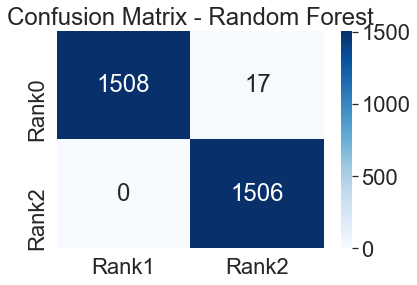

In [35]:
y_pred = M_RF.predict(x_test)
confmat = confusion_matrix(y_true=y_test, y_pred=RF_Pred1)

index = ["Rank0", "Rank2"]
columns = ["Rank1", "Rank2"]
conf_matrix = pd.DataFrame(data=confmat, columns=columns, index=index)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.show()

Light GBM

In [31]:
sub_features = 0.5 

M_LG = LGBMClassifier(n_estimators=100, learning_rate=0.1, objective='binary', max_depth=4, 
                     subsample=1.0, colsample_bytree=sub_features)

M_LG.fit(x_train,y_train)
LG_Pred = M_LG.predict(x_train)
LG_Pred1 = M_LG.predict(x_test)

acc_lg = round(M_LG.score(x_train, y_train) * 100, 2)
acc_lg1 = round(M_LG.score(x_test, y_test) * 100, 2)
f1_Score2 = round(f1_score(y_test, LG_Pred1, average='macro') * 100, 2)
P_Score2 = round(precision_score(y_test, LG_Pred1, average='macro') * 100, 2)
R_Score2 = round(recall_score(y_test, LG_Pred1, average='macro') * 100, 2)

print("\nTrain Accuracy", acc_lg)
print("Test Accuracy", acc_lg1)
print("F1 Score", f1_Score2)
print("Precision Score", P_Score2)
print("Recall Score", R_Score2)


Train Accuracy 99.52
Test Accuracy 99.41
F1 Score 99.41
Precision Score 99.41
Recall Score 99.41


In [32]:
print('\nClassification Report for Training\n')
c_lgb = classification_report(y_train,LG_Pred)
print(c_lgb)


Classification Report for Training

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      6052
           1       0.99      1.00      1.00      6071

    accuracy                           1.00     12123
   macro avg       1.00      1.00      1.00     12123
weighted avg       1.00      1.00      1.00     12123



In [33]:
cv = cross_validate(M_LG, x_train, y_train, cv=10)
print(cv['test_score'])
print(cv['test_score'].mean())

[0.99752679 0.99670239 0.99093157 0.99422442 0.99669967 0.99174917
 0.99422442 0.99339934 0.99339934 0.99669967]
0.9945556798054085


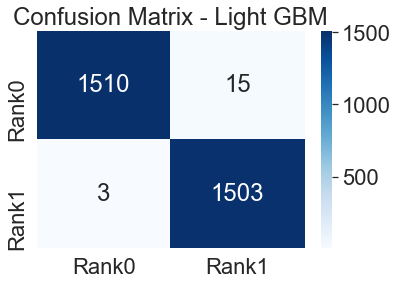

In [34]:
y_pred = M_LG.predict(x_test)
confmat = confusion_matrix(y_true=y_test, y_pred=LG_Pred1)

index = ["Rank0", "Rank1"]
columns = ["Rank0", "Rank1"]
conf_matrix = pd.DataFrame(data=confmat, columns=columns, index=index)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Light GBM")
plt.show()

XG Boost

In [36]:
depths = 3
ML_XG = XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.8, learning_rate = 0.1,
            max_depth = depths, alpha = 10, n_estimators = 5) # default objective='multi:softmax', num_class=2, colsample_bytree = 0.3


ML_XG.fit(x_train,y_train)
XG_Pred = ML_XG.predict(x_train)
XG_Pred1 = ML_XG.predict(x_test)
                

acc_XG = round(ML_XG.score(x_train, y_train) * 100, 2)
acc_XG1 = round(ML_XG.score(x_test, y_test) * 100, 2)
f1_Score2 = round(f1_score(y_test, XG_Pred1, average='macro') * 100, 2)
P_Score2 = round(precision_score(y_test, XG_Pred1, average='macro') * 100, 2)
R_Score2 = round(recall_score(y_test, XG_Pred1, average='macro') * 100, 2)


print("\nTrain Accuracy", acc_XG)
print("Test Accuracy", acc_XG1)
print("F1 Score", f1_Score2)
print("Precision Score", P_Score2)
print("Recall Score", R_Score2)

[17:02:59] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

Train Accuracy 92.44
Test Accuracy 92.94
F1 Score 92.91
Precision Score 93.78
Recall Score 92.98


C:\Users\sahmed1\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [38]:
cv = cross_validate(ML_XG, x_train, y_train, cv=10)
print(cv['test_score'])
print(cv['test_score'].mean())

C:\Users\sahmed1\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\sahmed1\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\sahmed1\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use 

[17:03:52] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:03:52] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:03:52] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:03:52] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

C:\Users\sahmed1\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\sahmed1\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\sahmed1\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use 

In [42]:
print('\nClassification Report for Training\n')
c_xgb = classification_report(y_train,XG_Pred)
print(c_xgb)


Classification Report for Training

              precision    recall  f1-score   support

           0       1.00      0.85      0.92      6052
           1       0.87      1.00      0.93      6071

    accuracy                           0.92     12123
   macro avg       0.93      0.92      0.92     12123
weighted avg       0.93      0.92      0.92     12123



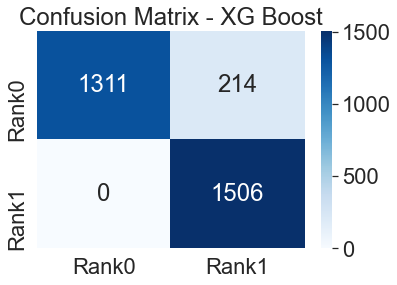

In [40]:
y_pred = ML_XG.predict(x_test)
confmat = confusion_matrix(y_true=y_test, y_pred=XG_Pred1)

index = ["Rank0", "Rank1"]
columns = ["Rank0", "Rank1"]
conf_matrix = pd.DataFrame(data=confmat, columns=columns, index=index)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - XG Boost")
plt.show()

Logistic Regression

In [28]:
M_LR = LogisticRegression(random_state=0, multi_class='ovr',solver='lbfgs',max_iter=200).fit(x_train, y_train)
LR_Pred = M_LR.predict(x_train)
LR_Pred1 = M_LR.predict(x_test)

acc_lr = round(M_LR.score(x_train, y_train) * 100, 2)
acc_lr1 = round(M_LR.score(x_test, y_test) * 100, 2)
f1_Score1 = round(f1_score(y_test, LR_Pred1, average='macro') * 100, 2)
P_Score1 = round(precision_score(y_test, LR_Pred1, average='macro') * 100, 2)
R_Score1 = round(recall_score(y_test, LR_Pred1, average='macro') * 100, 2)
# Append to the accuracy list

print("\nTrain Accuracy", acc_lr)
print("Test Accuracy", acc_lr1)
print("F1 Score", f1_Score1)
print("Precision Score", P_Score1)
print("Recall Score", R_Score1)


Train Accuracy 93.06
Test Accuracy 93.2
F1 Score 93.2
Precision Score 93.31
Recall Score 93.23


C:\Users\sahmed1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:
print('\nClassification Report for Training\n')
c_lr = classification_report(y_train,LR_Pred)
print(c_lr)


Classification Report for Training

              precision    recall  f1-score   support

           0       0.95      0.91      0.93      6046
           1       0.91      0.95      0.93      6077

    accuracy                           0.93     12123
   macro avg       0.93      0.93      0.93     12123
weighted avg       0.93      0.93      0.93     12123



C:\Users\sahmed1\Anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:949: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn("No positive samples in y_true, "


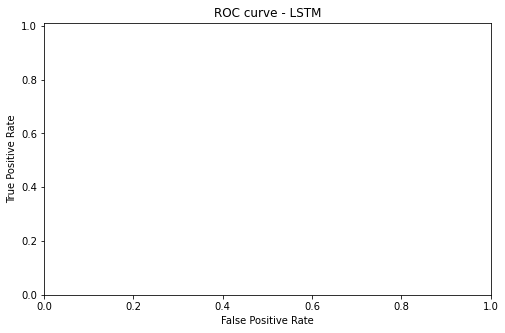

In [42]:
y_scoreLR = M_LR.predict_proba(x_test)
fpr["Logistic Regression"], tpr["Logistic Regression"], _= roc_curve(Ye[:,0], y_scoreLR[:,0])

plt.figure(figsize=(8, 5))
plt.step(tpr["Logistic Regression"],fpr["Logistic Regression"],  where="post")

plt.title("ROC curve - LSTM")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.show()

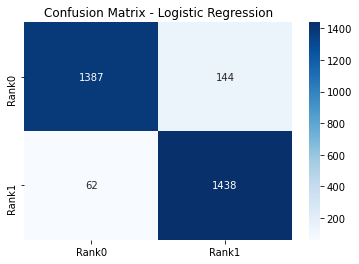

In [41]:
y_pred = M_LR.predict(x_test)
confmat = confusion_matrix(y_true=y_test, y_pred=LR_Pred1)

index = ["Rank0", "Rank1"]
columns = ["Rank0", "Rank1"]
conf_matrix = pd.DataFrame(data=confmat, columns=columns, index=index)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

SVM

In [21]:
M_SVM = LinearSVC()
M_SVM.fit(x_train,y_train)
SVM_Pred = M_SVM.predict(x_train)
SVM_Pred1 = M_SVM.predict(x_test)

acc_svm = round(M_SVM.score(x_train, y_train) * 100, 2)
acc_svm1 = round(M_SVM.score(x_test, y_test) * 100, 2)
f1_Score1 = round(f1_score(y_test, SVM_Pred1, average='macro') * 100, 2)
P_Score1 = round(precision_score(y_test, SVM_Pred1, average='macro') * 100, 2)
R_Score1 = round(recall_score(y_test, SVM_Pred1, average='macro') * 100, 2)
# Append to the accuracy list

print("\nTrain Accuracy", acc_lr)
print("Test Accuracy", acc_lr1)
print("F1 Score", f1_Score1)
print("Precision Score", P_Score1)
print("Recall Score", R_Score1)


Train Accuracy 93.06
Test Accuracy 93.2
F1 Score 87.44
Precision Score 89.92
Recall Score 87.72


C:\Users\sahmed1\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [22]:
print('\nClassification Report for Training\n')
c_lr = classification_report(y_train,LR_Pred)
print(c_lr)


Classification Report for Training

              precision    recall  f1-score   support

           0       0.95      0.91      0.93      6046
           1       0.91      0.95      0.93      6077

    accuracy                           0.93     12123
   macro avg       0.93      0.93      0.93     12123
weighted avg       0.93      0.93      0.93     12123



In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
from sklearn import datasets
from sklearn.inspection import partial_dependence
from sklearn.inspection import plot_partial_dependence
from sklearn.inspection import permutation_importance

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.preprocessing import label_binarize
from sklearn.neighbors import KNeighborsClassifier
Ye = label_binarize(y_test, classes=[1, 2])
y_scoreNB = SVM_Pred.predict_proba(x_test)
fpr["SVM"], tpr["SVM"], _= roc_curve(Ye[:,0], y_scoreNB[:,0])

plt.figure(figsize=(8, 5))
plt.step(tpr["SVM"],fpr["SVM"],  where="post")

plt.title("ROC curve - LSTM")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'predict_proba'

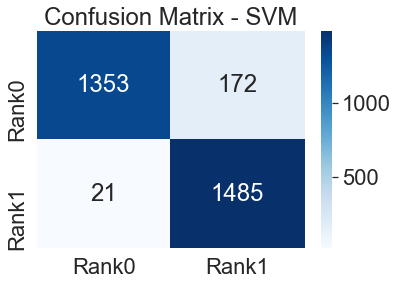

In [53]:
y_pred = M_SVM.predict(x_test)
confmat = confusion_matrix(y_true=y_test, y_pred=SVM_Pred1)

index = ["Rank0", "Rank1"]
columns = ["Rank0", "Rank1"]
conf_matrix = pd.DataFrame(data=confmat, columns=columns, index=index)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - SVM")
plt.show()

# Gaussian Naive Bayes

In [37]:
M_NB = GaussianNB()
M_NB.fit(x_train,y_train)
NB_Pred = M_NB.predict(x_train)
NB_Pred1 = M_NB.predict(x_test)
acc_NB = round(M_NB.score(x_train, y_train) * 100, 2)
acc_NB1 = round(M_NB.score(x_test, y_test) * 100, 2)
f1_Score2 = round(f1_score(y_test, NB_Pred1, average='macro') * 100, 2)
P_Score2 = round(precision_score(y_test, NB_Pred1, average='macro') * 100, 2)
R_Score2 = round(recall_score(y_test, NB_Pred1, average='macro') * 100, 2)

print("\nTrain Accuracy", acc_NB)
print("Test Accuracy", acc_NB1)
print("F1 Score", f1_Score2)
print("Precision Score", P_Score2)
print("Recall Score", R_Score2)


Train Accuracy 91.83
Test Accuracy 91.39
F1 Score 91.34
Precision Score 92.59
Recall Score 91.48


In [38]:
print('\nClassification Report for Training\n')
c_nb = classification_report(y_train,NB_Pred)
print(c_nb)


Classification Report for Training

              precision    recall  f1-score   support

           0       1.00      0.84      0.91      6046
           1       0.86      1.00      0.92      6077

    accuracy                           0.92     12123
   macro avg       0.93      0.92      0.92     12123
weighted avg       0.93      0.92      0.92     12123



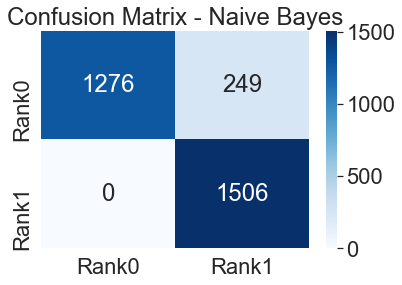

In [57]:
y_pred = M_NB.predict(x_test)
confmat = confusion_matrix(y_true=y_test, y_pred=NB_Pred1)

index = ["Rank0", "Rank1"]
columns = ["Rank0", "Rank1"]
conf_matrix = pd.DataFrame(data=confmat, columns=columns, index=index)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Naive Bayes")
plt.show()

C:\Users\sahmed1\Anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:949: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn("No positive samples in y_true, "


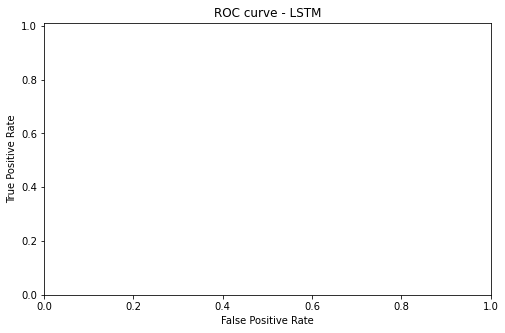

In [40]:
y_scoreLR = M_NB.predict_proba(x_test)
fpr["Naive Bayes"], tpr["Naive Bayes"], _= roc_curve(Ye[:,0], y_scoreLR[:,0])

plt.figure(figsize=(8, 5))
plt.step(tpr["Naive Bayes"],fpr["Naive Bayes"],  where="post")

plt.title("ROC curve - LSTM")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.show()